<a href="https://colab.research.google.com/github/seyrankhademi/Interactive_Arch_Q3_P1/blob/main/Interactive_Arch_Q3_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import necessary library to read and display an image 
from matplotlib import pyplot as plt
#both local and remote images can be read using Jupyter notebook 
img = plt.imread("http://matplotlib.sourceforge.net/_static/logo2.png")


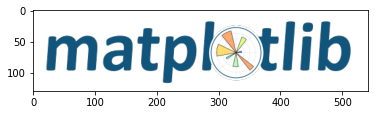

In [35]:
import matplotlib.pyplot as plt
img = plt.imread("http://matplotlib.sourceforge.net/_static/logo2.png")
imread = print(img)
imgplot = plt.imshow(img)

In [24]:

import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("http://answers.opencv.org/upfiles/logo_2.png")
#imgplot = cv2.imshow(img)
cv2.imshow(img)
cv2.waitKey(0)

DisabledFunctionError: ignored